# ACCIDENTS UNDERCOVERD: FACTORS BEHINED ROAD CRASHES
### Road Accident Records in Kensington and Chelsea 


## 📘 Introduction

Road traffic accidents are a major public safety issue with wide-reaching consequences. Understanding the patterns and causes of these incidents is essential for developing strategies to reduce both their frequency and severity. This project performs exploratory data analysis (EDA) on a road accident dataset to uncover key insights related to accident timing, road types, weather, lighting, and speed limits. By identifying high-risk factors and scenarios, this analysis aims to support data-driven improvements in road safety policies and infrastructure planning.



## ❗ Problem Statement

Despite existing safety measures, road accidents continue to result in significant fatalities and injuries. A lack of understanding of when, where, and why these accidents occur limits the ability to implement effective prevention strategies. This project seeks to analyze patterns in accident frequency and severity across various conditions (weather, time of day, lighting, road type, and speed limit) to identify contributing risk factors.

## 🎯 Objectives

- To determine when road accidents are most likely to occur, considering the **day of the week** and **time of day**.
- To analyze how **weather conditions** affect accident frequency and severity.
- To investigate the relationship between **road type** and accident risk.
- To assess the impact of **speed limits** on the severity of road accidents.
- To evaluate how **lighting conditions** influence accident occurrence and fatality rates.
- To explore how carriageway hazards affect fatality rates under **darkness conditions**.

## 👥 Target Audience

- **Local Government Authorities** – to support data-driven infrastructure decisions and urban planning.
- **Transport & Highway Safety Departments** – for developing targeted safety campaigns and signage.
- **Policy Makers** – to inform evidence-based legislative decisions around speed limits and lighting.
- **Academic Researchers & Students** – exploring traffic safety, transportation engineering, and data science.

## 📦 Dataset

The dataset used for this project was obtained from Kaggle.
🔗 [View Dataset Source](https://www.kaggle.com/datasets/nextmillionaire/car-accident-dataset/data)

This dataset provides detailed records of road accidents from January 2021 - December 2022 in Kensington and Chelsea.

| Column Name                 | Description                                                                                  |
|----------------------------|----------------------------------------------------------------------------------------------|
| Accident_Index             | Unique identifier for each accident.                                                         |
| Accident Date              | Date when the accident occurred.                                                             |
| Day_of_Week                | Day of the week the accident happened (e.g., Monday, Tuesday).                               |
| Junction_Control           | Type of control at the junction (e.g., traffic signals, give way, stop sign).               |
| Junction_Detail            | Type of junction where the accident happened (e.g., crossroads, staggered junction).         |
| Accident_Severity          | Severity of the accident (e.g., Fatal, Serious, Slight).                                     |
| Latitude                   | Latitude coordinate of the accident location.                                                |
| Light_Conditions           | Lighting conditions at the time of the accident (e.g., daylight, darkness with streetlights, darkness without streetlights). |
| Local_Authority_(District) | Name of the local authority or district where the accident occurred.                         |
| Carriageway_Hazards        | Any hazards present on the road (e.g., oil or diesel spill, roadworks, none).                |
| Number_of_Casualties       | Total number of people injured or killed in the accident.                                    |
| Number_of_Vehicles         | Total number of vehicles involved in the accident.                                           |
| Police_Force               | Police force responsible for the accident report.                                            |
| Road_Surface_Conditions    | Condition of the road surface (e.g., dry, wet, icy).                                         |
| Road_Type                  | Type of road where the accident occurred (e.g., single carriageway, dual carriageway).       |
| Speed_limit                | Speed limit of the road at the accident location.                                            |
| Time                       | Time of the accident in HH:MM format.                                                        |
| Urban_or_Rural_Area        | Whether the accident happened in an urban or rural area.                                     |
| Weather_Conditions         | Weather conditions at the time of the accident (e.g., fine, rain, fog).                      |
| Vehicle_Type               | Type of vehicle involved in the accident (e.g., car, motorcycle, bus).                       |


In [1]:
import pandas as pd
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import seaborn as sns
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Road Accident Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [4]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


<Axes: >

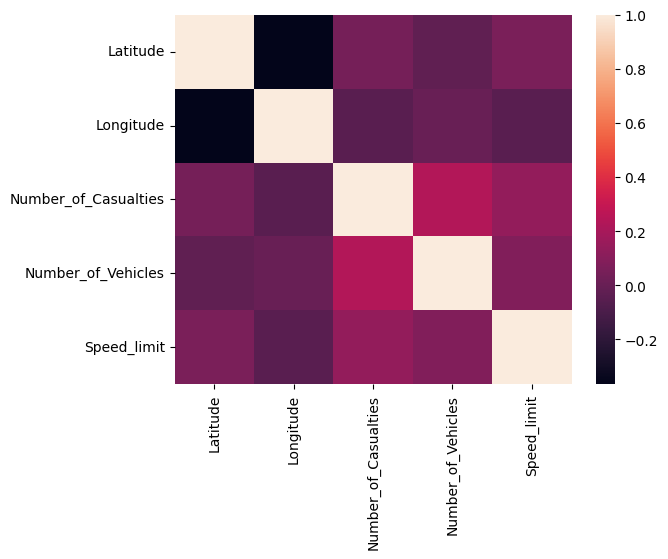

In [5]:
sns.heatmap(df.corr(numeric_only=True))

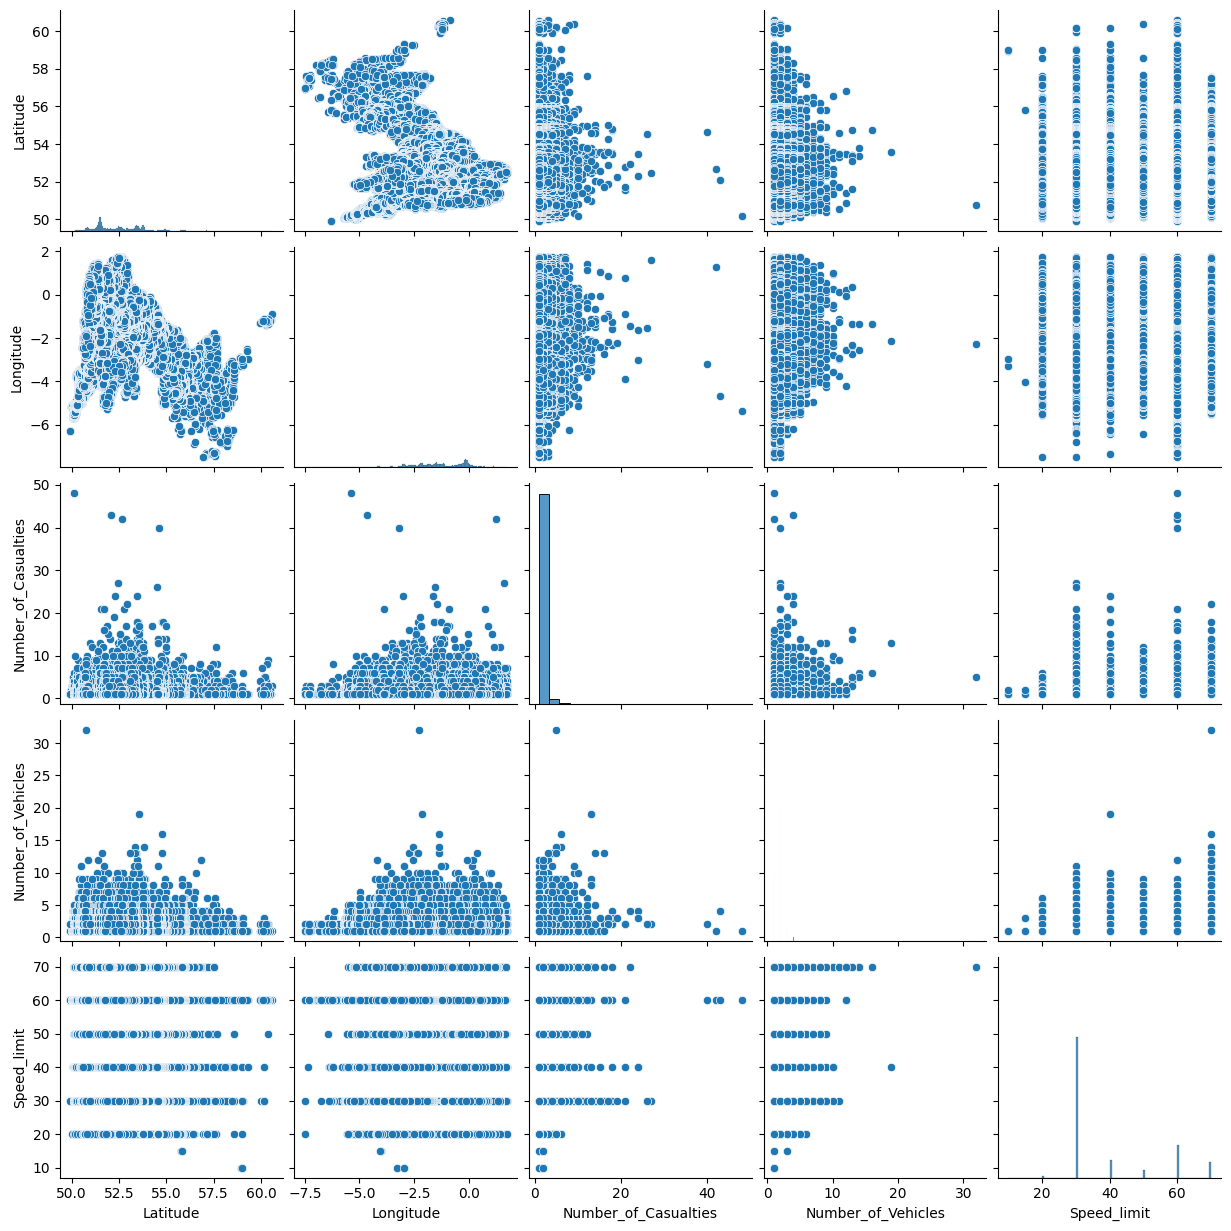

In [6]:
sns.pairplot(df)

## 🧹 Data Cleaning

In [7]:
#checking the % of nulls compared to whole data 
row,col = df.shape
(df.isna().sum()/row)*100

Accident_Index                 0.000000
Accident Date                  0.000000
Day_of_Week                    0.000000
Junction_Control               0.000000
Junction_Detail                0.000000
Accident_Severity              0.000000
Latitude                       0.000000
Light_Conditions               0.000000
Local_Authority_(District)     0.000000
Carriageway_Hazards           98.238807
Longitude                      0.000000
Number_of_Casualties           0.000000
Number_of_Vehicles             0.000000
Police_Force                   0.000000
Road_Surface_Conditions        0.102931
Road_Type                      0.498096
Speed_limit                    0.000000
Time                           0.005520
Urban_or_Rural_Area            0.000000
Weather_Conditions             1.966731
Vehicle_Type                   0.000000
dtype: float64

In [8]:
df['Carriageway_Hazards'].fillna('None',inplace=True)

C:\Users\saljo\AppData\Local\Temp\ipykernel_26684\1242003095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Carriageway_Hazards'].fillna('None',inplace=True)


In [9]:
row,col = df.shape
(df.isna().sum()/row)*100

Accident_Index                0.000000
Accident Date                 0.000000
Day_of_Week                   0.000000
Junction_Control              0.000000
Junction_Detail               0.000000
Accident_Severity             0.000000
Latitude                      0.000000
Light_Conditions              0.000000
Local_Authority_(District)    0.000000
Carriageway_Hazards           0.000000
Longitude                     0.000000
Number_of_Casualties          0.000000
Number_of_Vehicles            0.000000
Police_Force                  0.000000
Road_Surface_Conditions       0.102931
Road_Type                     0.498096
Speed_limit                   0.000000
Time                          0.005520
Urban_or_Rural_Area           0.000000
Weather_Conditions            1.966731
Vehicle_Type                  0.000000
dtype: float64

#### checking and removing duplicates

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
clean_df = df.drop_duplicates().copy()

#### checking on spelling and uniqueness of data to ensure data accuracy 

In [12]:
clean_df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [13]:
clean_df["Junction_Detail"].unique()

array(['T or staggered junction', 'Crossroads',
       'Not at junction or within 20 metres', 'Roundabout',
       'Mini-roundabout', 'More than 4 arms (not roundabout)',
       'Private drive or entrance', 'Slip road', 'Other junction'],
      dtype=object)

| Junction Type                         | Description                                                                 |
|--------------------------------------|-----------------------------------------------------------------------------|
| T or Staggered Junction              | A junction where one road meets another at a perpendicular or offset angle.|
| Crossroads                           | An intersection where two roads cross each other, forming a "+" shape.     |
| Not at Junction or within 20 metres  | Accidents that occurred away from any junction, or close but not at one.   |
| Roundabout                           | Circular intersection where traffic moves in one direction around a center.|
| Mini-roundabout                      | A smaller version of a roundabout, often marked by a painted circle.       |
| More than 4 arms (not roundabout)    | Complex junctions with more than four connecting roads, but not circular.  |
| Private Drive or Entrance            | Entry/exit points to private properties such as driveways or business lots.|
| Slip Road                            | A road used for entering or exiting a major carriageway or motorway.       |
| Other Junction                       | Any junction type that does not fit into the listed categories.            |



In [14]:
clean_df["Day_of_Week"].unique()

array(['Thursday', 'Monday', 'Sunday', 'Tuesday', 'Friday', 'Wednesday',
       'Saturday'], dtype=object)

In [15]:
clean_df["Accident_Severity"].unique()

array(['Serious', 'Slight', 'Fetal', 'Fatal'], dtype=object)

In [16]:
clean_df["Accident_Severity"]=clean_df["Accident_Severity"].replace("Fetal","Fatal")

In [17]:
clean_df["Accident_Severity"].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [18]:
clean_df["Light_Conditions"].unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness - lighting unknown',
       'Darkness - lights unlit', 'Darkness - no lighting'], dtype=object)

#### Light_Conditions
- Darkness - Lights Lit

It was dark, but there were artificial lights (e.g., streetlights, vehicle lights) that were turned on and functioning.
- Darkness - Lighting Unknown

It was dark, but it is unclear whether artificial lighting was present or functioning.
- Darkness - Lights Unlit

It was dark, and artificial lights (e.g., streetlights) were present but not turned on.
- Darkness - No Lighting

It was dark, and there were no artificial lights available in the area (e.g., a rural road without streetlights)

In [19]:
clean_df["Carriageway_Hazards"].unique()

array(['None', 'Pedestrian in carriageway - not injured',
       'Other object on road',
       'Any animal in carriageway (except ridden horse)',
       'Previous accident', 'Vehicle load on road'], dtype=object)

In [20]:
clean_df["Road_Surface_Conditions"].unique()

array(['Dry', 'Wet or damp', 'Frost or ice', 'Snow',
       'Flood over 3cm. deep', nan], dtype=object)

In [21]:
clean_df["Road_Type"].unique()

array(['One way street', 'Single carriageway', 'Dual carriageway',
       'Roundabout', 'Slip road', nan], dtype=object)

## 🚧 Road Types and Key Features

### 🛣️ One Way Street
- Traffic flows in **one direction only**
- Common in urban/dense areas
- Reduces conflict points from oncoming traffic
- Can improve traffic flow and simplify intersections
- May create confusion for unfamiliar drivers

---

### 🛤️ Single Carriageway
- One lane (or more) in each direction
- **No physical separation** between directions
- Higher risk for overtaking collisions
- Common in rural areas or older urban layouts
- Slower traffic due to limited passing opportunities

---

### 🛣️ Dual Carriageway
- Two or more lanes in each direction
- **Separated by a physical barrier or median**
- Safer than single carriageways for head-on collisions
- Supports higher speeds and traffic volumes
- Entry/exit via slip roads or interchanges

---

### 🔁 Roundabout
- Circular junction with yield-on-entry rule
- Promotes continuous traffic flow
- Reduces severe collision types (e.g., T-bones)
- Can be complex for pedestrians/cyclists
- Effective at managing multi-road intersections

---

### ↗️ Slip Road
- Short road used to **enter or exit** a major road
- Designed for smooth merging or deceleration
- Critical for freeway/motorway access
- Merge zones can be high-risk if ramps are too short
- Important in traffic modeling and capacity planning



In [22]:
clean_df["Urban_or_Rural_Area"].unique()

array(['Urban', 'Rural'], dtype=object)

In [23]:
#fill nulls with 'other' 
clean_df["Weather_Conditions"].unique()

array(['Fine no high winds', 'Other', 'Raining no high winds',
       'Snowing no high winds', 'Fine + high winds',
       'Raining + high winds', nan, 'Snowing + high winds', 'Fog or mist'],
      dtype=object)

In [24]:
clean_df["Weather_Conditions"].fillna('Other',inplace=True)

C:\Users\saljo\AppData\Local\Temp\ipykernel_26684\3820526391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df["Weather_Conditions"].fillna('Other',inplace=True)


In [25]:
clean_df["Weather_Conditions"].unique()

array(['Fine no high winds', 'Other', 'Raining no high winds',
       'Snowing no high winds', 'Fine + high winds',
       'Raining + high winds', 'Snowing + high winds', 'Fog or mist'],
      dtype=object)

In [26]:
clean_df["Vehicle_Type"].unique()

array(['Car', 'Taxi/Private hire car', 'Motorcycle over 500cc',
       'Van / Goods 3.5 tonnes mgw or under',
       'Goods over 3.5t. and under 7.5t', 'Motorcycle 125cc and under',
       'Motorcycle 50cc and under',
       'Bus or coach (17 or more pass seats)',
       'Goods 7.5 tonnes mgw and over', 'Other vehicle',
       'Motorcycle over 125cc and up to 500cc', 'Agricultural vehicle',
       'Minibus (8 - 16 passenger seats)', 'Pedal cycle', 'Ridden horse'],
      dtype=object)

In [27]:
clean_df["Junction_Control"].unique()

array(['Give way or uncontrolled', 'Auto traffic signal',
       'Data missing or out of range', 'Authorised person', 'Stop sign',
       'Not at junction or within 20 metres', 'Auto traffic sigl'],
      dtype=object)

In [28]:
clean_df["Accident_Severity"]=clean_df["Accident_Severity"].replace("Auto traffic sigl","Auto traffic signal")

In [30]:
clean_df['Vehicle_Type'].unique()

array(['Car', 'Taxi/Private hire car', 'Motorcycle over 500cc',
       'Van / Goods 3.5 tonnes mgw or under',
       'Goods over 3.5t. and under 7.5t', 'Motorcycle 125cc and under',
       'Motorcycle 50cc and under',
       'Bus or coach (17 or more pass seats)',
       'Goods 7.5 tonnes mgw and over', 'Other vehicle',
       'Motorcycle over 125cc and up to 500cc', 'Agricultural vehicle',
       'Minibus (8 - 16 passenger seats)', 'Pedal cycle', 'Ridden horse'],
      dtype=object)

| **Vehicle Type**                                 | **Description**                                                                 |
|--------------------------------------------------|----------------------------------------------------------------------------------|
| **Car**                                          | Standard private passenger vehicle with up to 5 seats.                          |
| **Taxi/Private hire car**                        | Vehicle used to carry passengers for hire, typically booked in advance.         |
| **Motorcycle over 500cc**                        | High-powered motorcycle, often used for long-distance travel or sport.          |
| **Van / Goods 3.5 tonnes mgw or under**          | Light commercial vehicle used for transporting goods, under 3.5 tonnes.         |
| **Goods over 3.5t and under 7.5t**               | Medium goods vehicle for heavier deliveries, between 3.5 and 7.5 tonnes.        |
| **Motorcycle 125cc and under**                   | Small motorcycle or scooter, often used for commuting.                          |
| **Motorcycle 50cc and under**                    | Very light motorcycles (mopeds), often limited in speed.                        |
| **Bus or coach (17 or more passenger seats)**    | Large public or private transport vehicle for group travel.                     |
| **Goods 7.5 tonnes mgw and over**                | Heavy goods vehicle (HGV), used for large-scale freight transport.              |
| **Other vehicle**                                | Any vehicle not categorized elsewhere, e.g. mobility scooters, construction rigs.|
| **Motorcycle over 125cc and up to 500cc**        | Mid-sized motorcycle, suitable for varied use including daily riding.           |
| **Agricultural vehicle**                         | Farm machinery such as tractors, used for agricultural purposes.                |
| **Minibus (8 - 16 passenger seats)**             | Small passenger vehicle, often used for schools or small group transport.       |
| **Pedal cycle**                                  | Bicycles powered by pedaling, with no engine.                                   |
| **Ridden horse**                                 | Horse being ridden on roads or paths, usually for recreation or transport.      |


In [ ]:
#clean_df.to_csv("Road_accident_Clean_data.csv")

## Analysis and Findings

#### Visualization and deep analysis were done in Power BI where two measures were calculated for further understanding.
 
 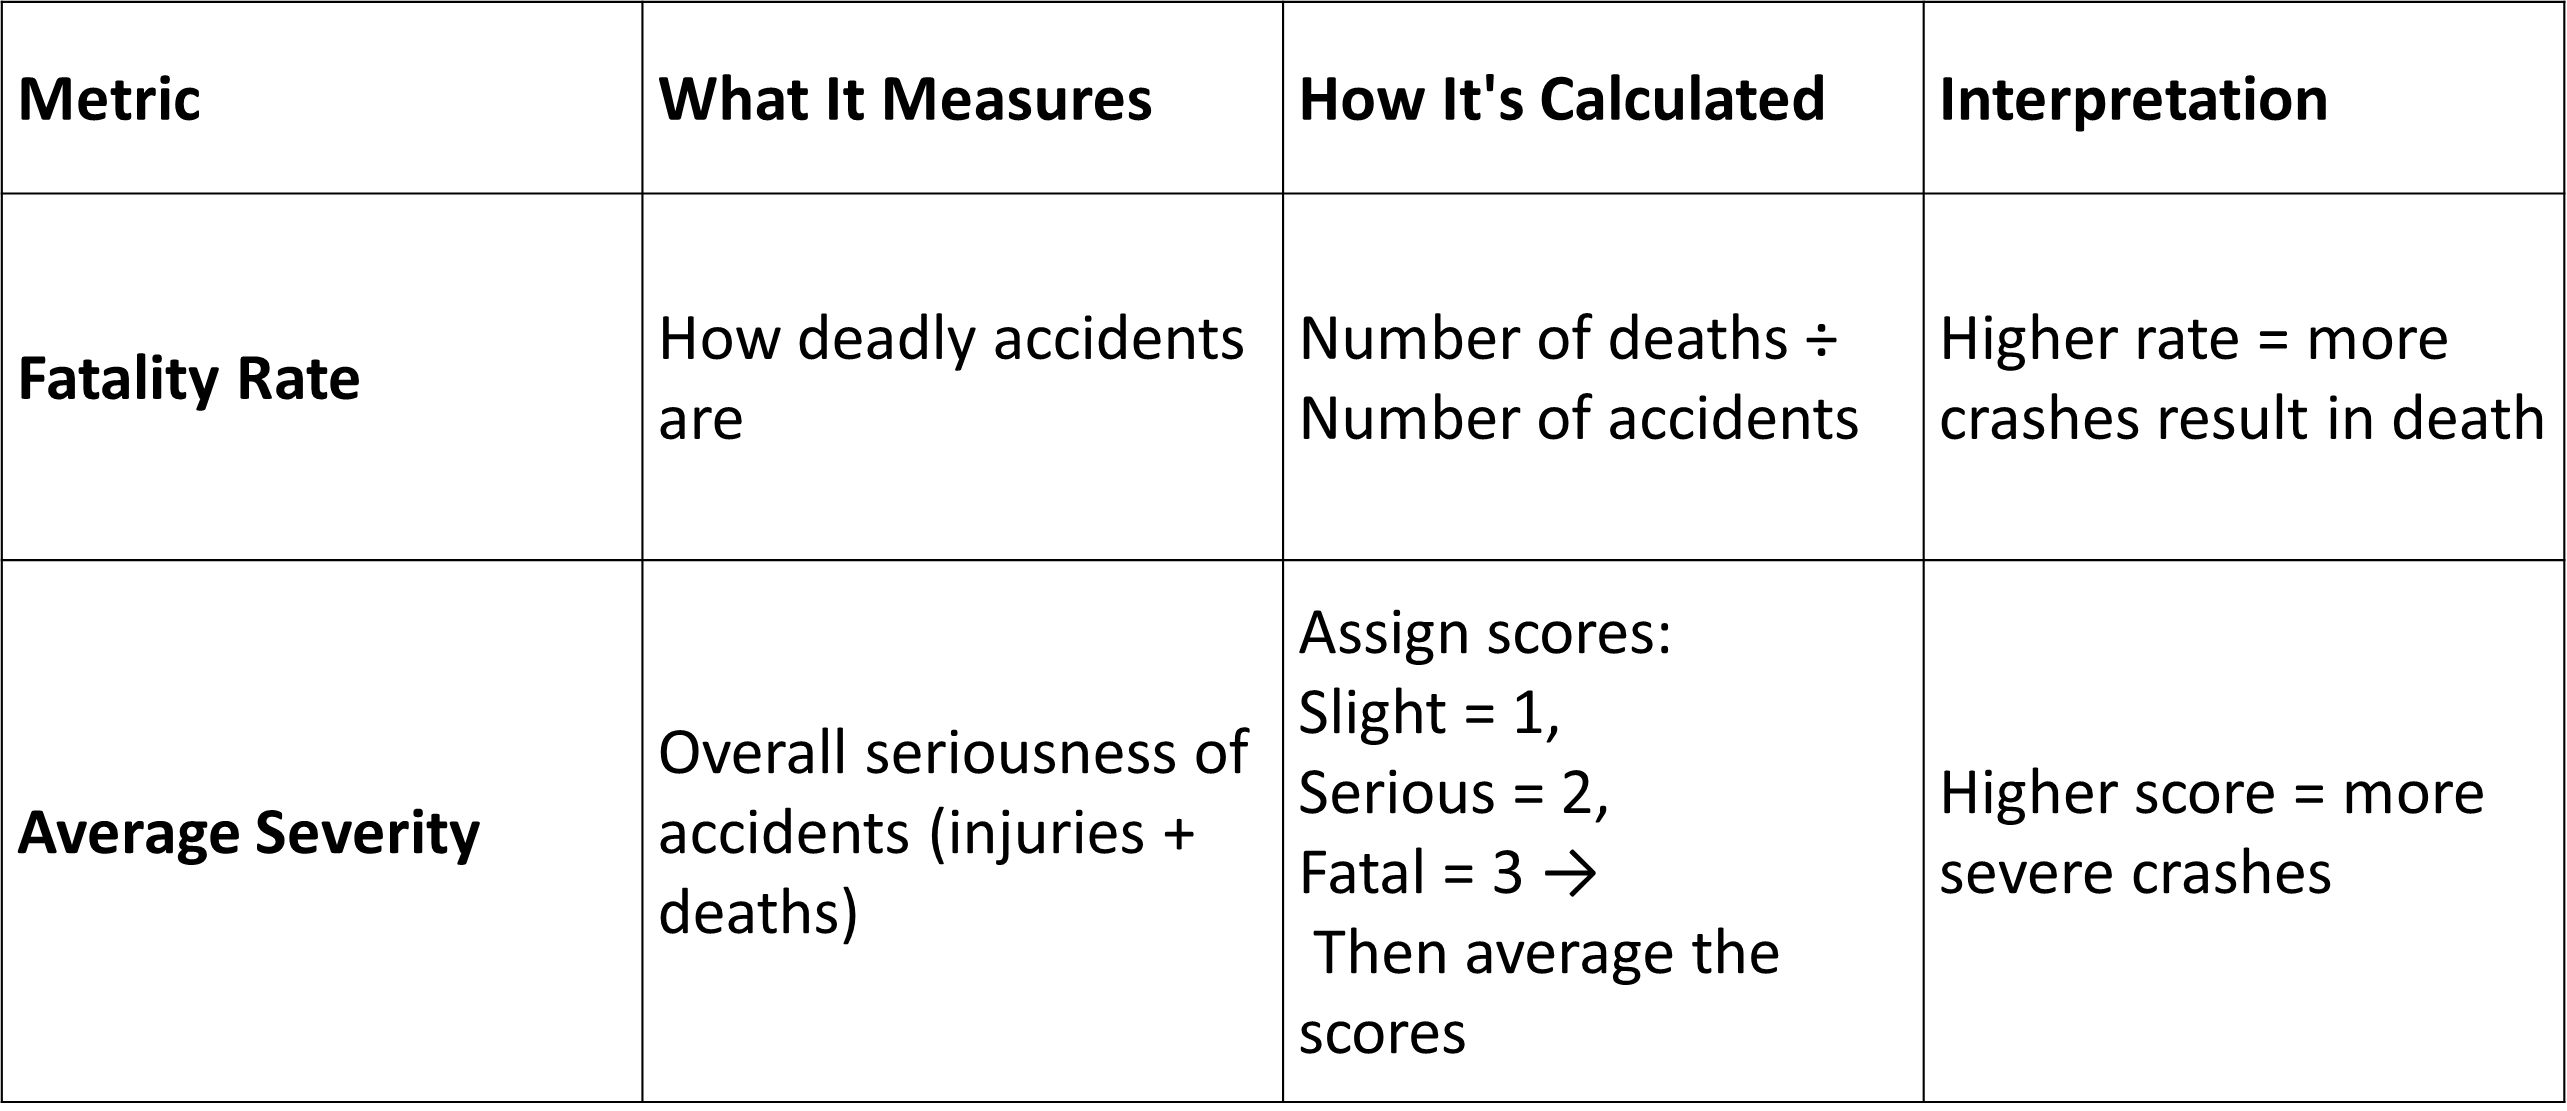

### Q1)WHEN ARE ACCIDENTS MOST LIKELY TO OCCUR, CONSIDERING DAY OF THE WEEK AND THE TIME OF DAY?



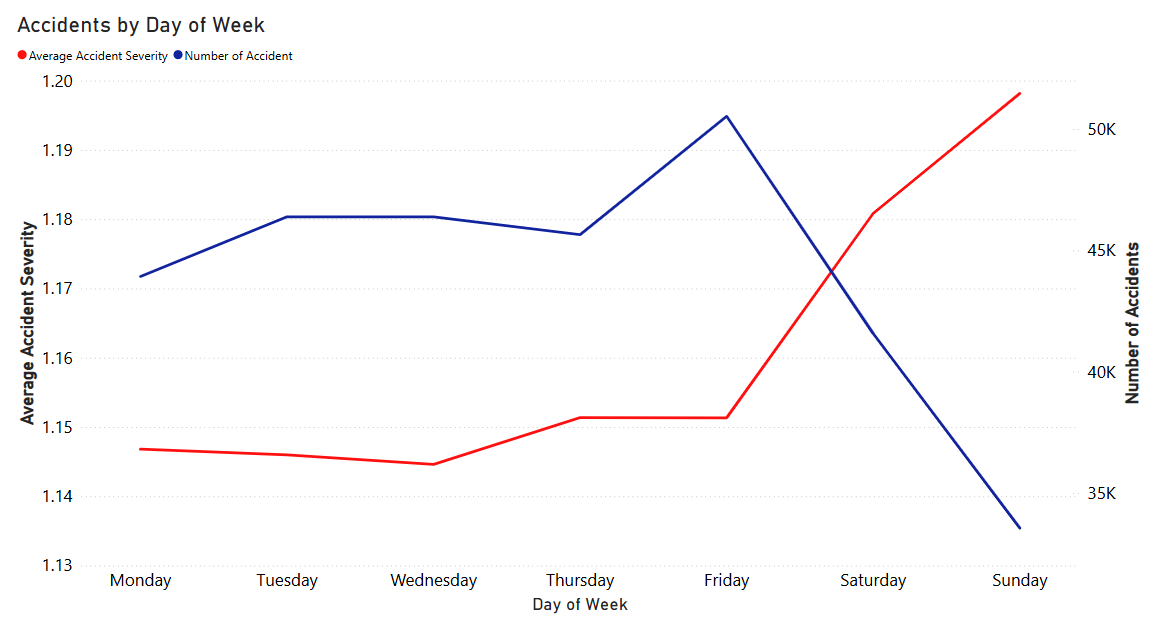

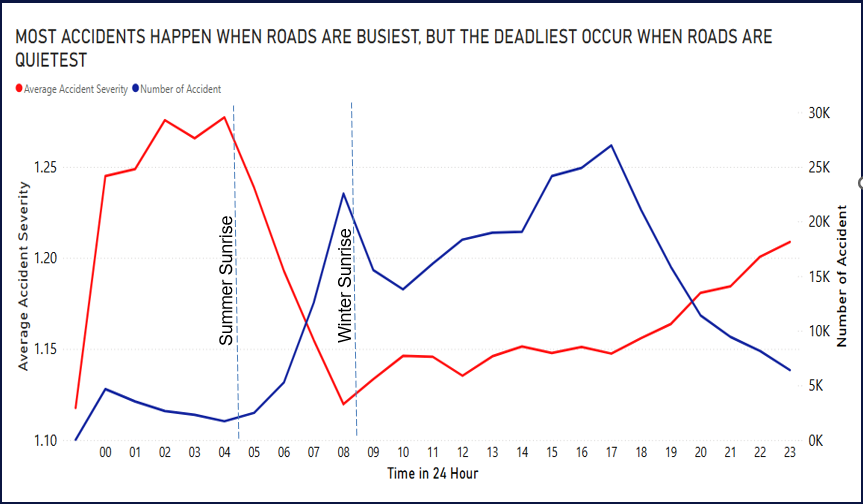

### Q2) HOW DO WEATHER CONDITIONS AFFECT ACCIDENTS FREQUENCY AND SEVERITY?


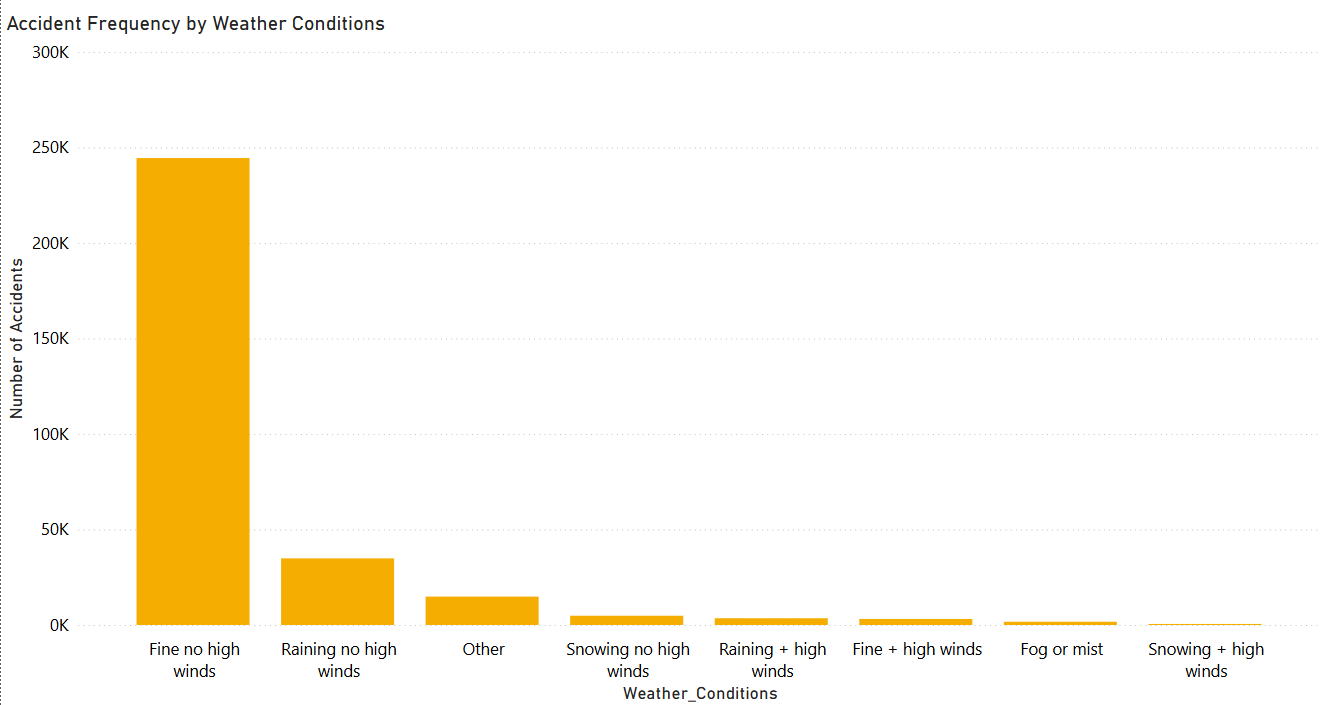

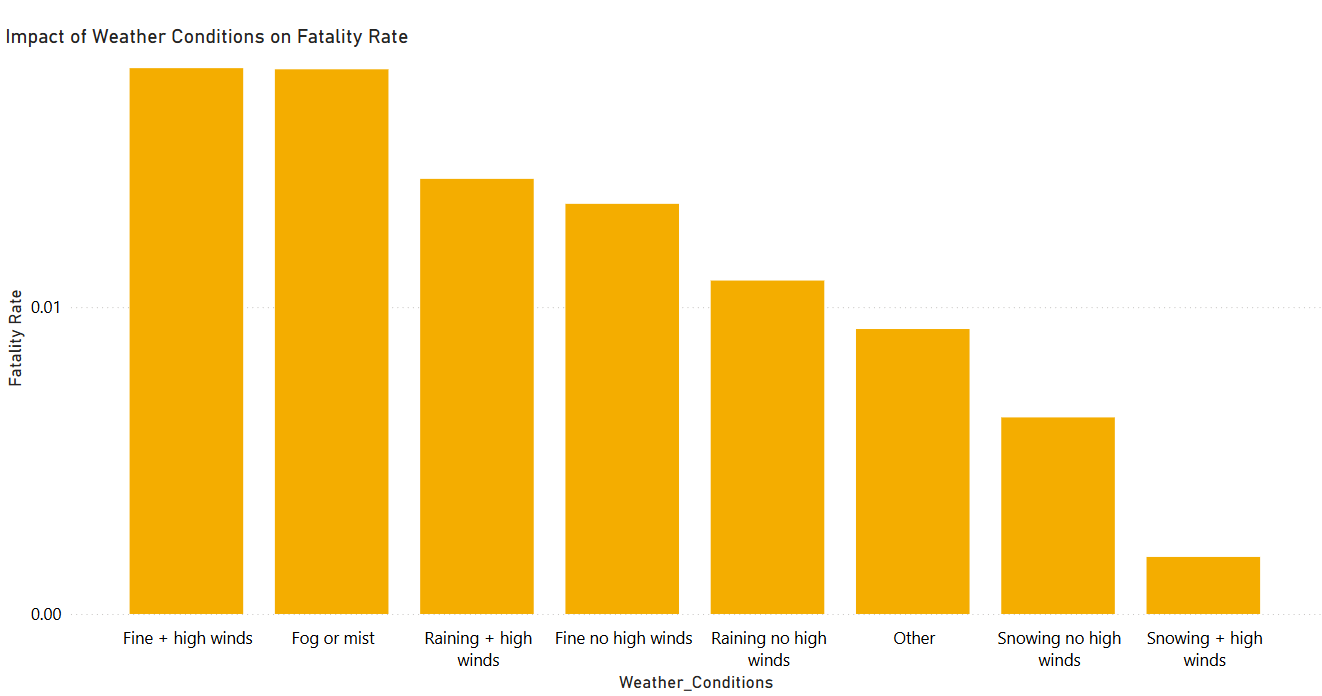

### Q3) IS THERE A CORRELATION BETWEEN ACCIDENT FREQUENCY, SEVERITY, AND ROAD TYPE?


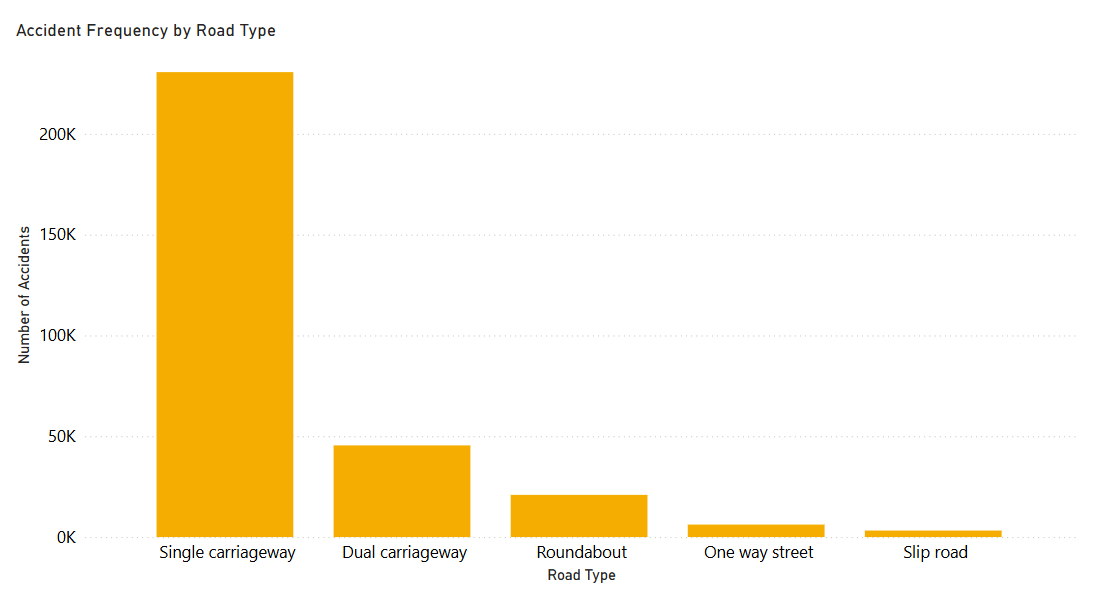

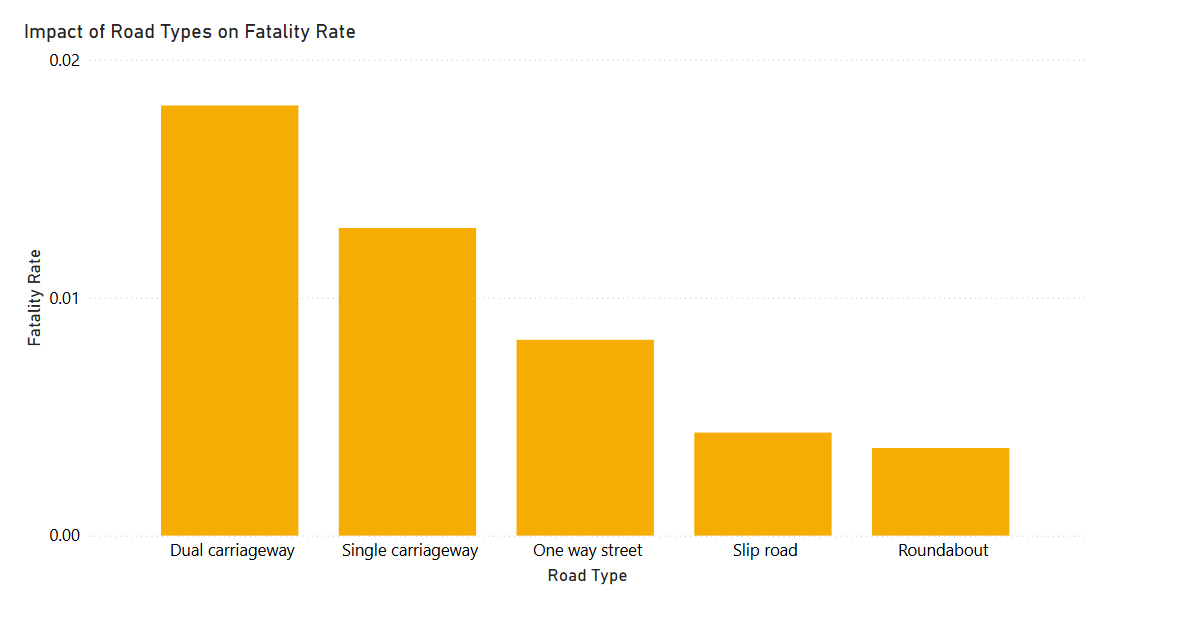

### Q4) HOW DOES THE SPEED LIMIT IMPACT THE SEVERITY OF ROAD ACCIDENTS?


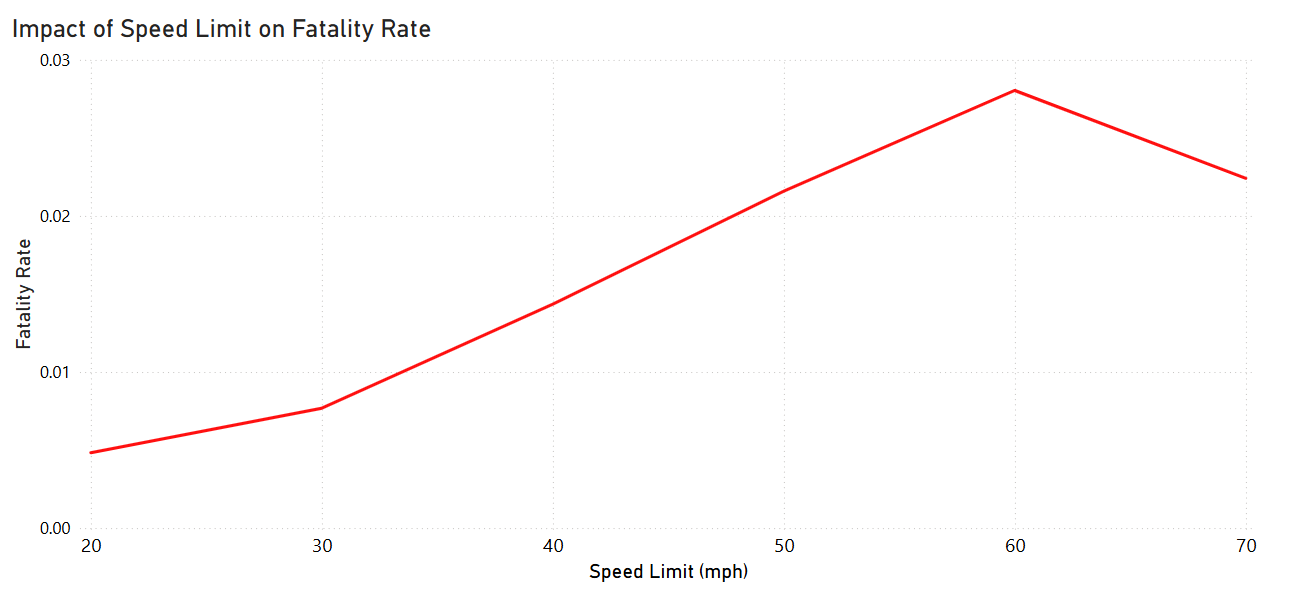

### Q5) ARE ACCIDENTS UNDER CERTAIN WEATHER CONDITIONS MORE SEVERE AT SPECIFIC ROAD TYPES?


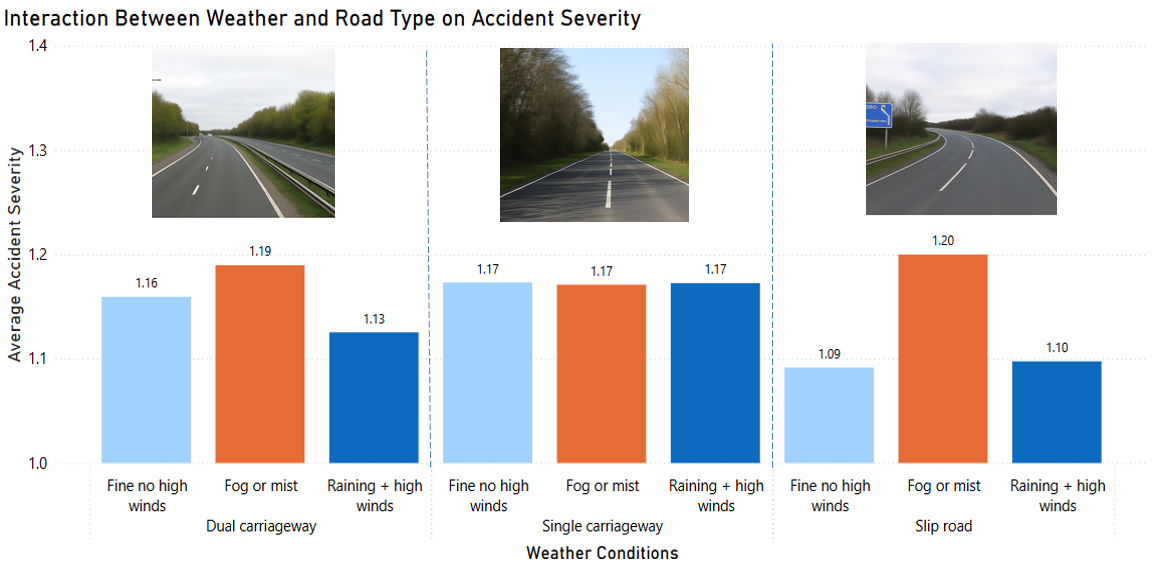

### Q6) HOW DO LIGHTING CONDITIONS INFLUENCE ACCIDENTS OCCURRENCE AND SEVERITY?


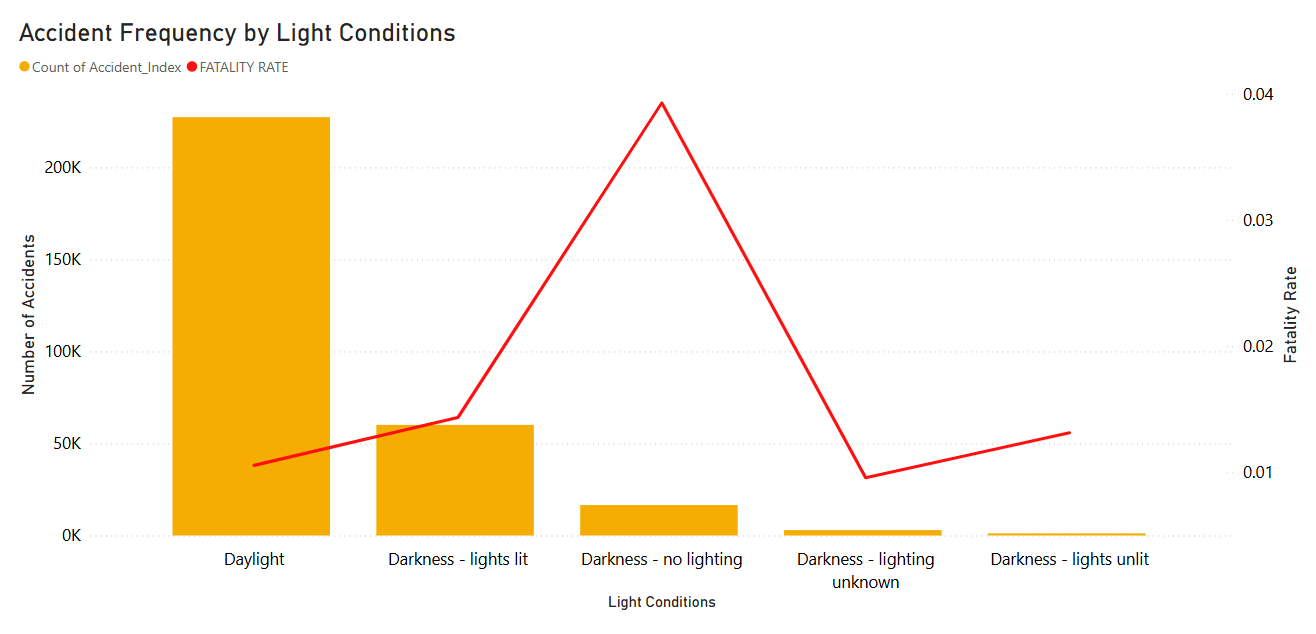

### Q7) WHICH CARRIAGEWAY HAZARDS ARE MOST DANGEROUS IN DARKNESS?


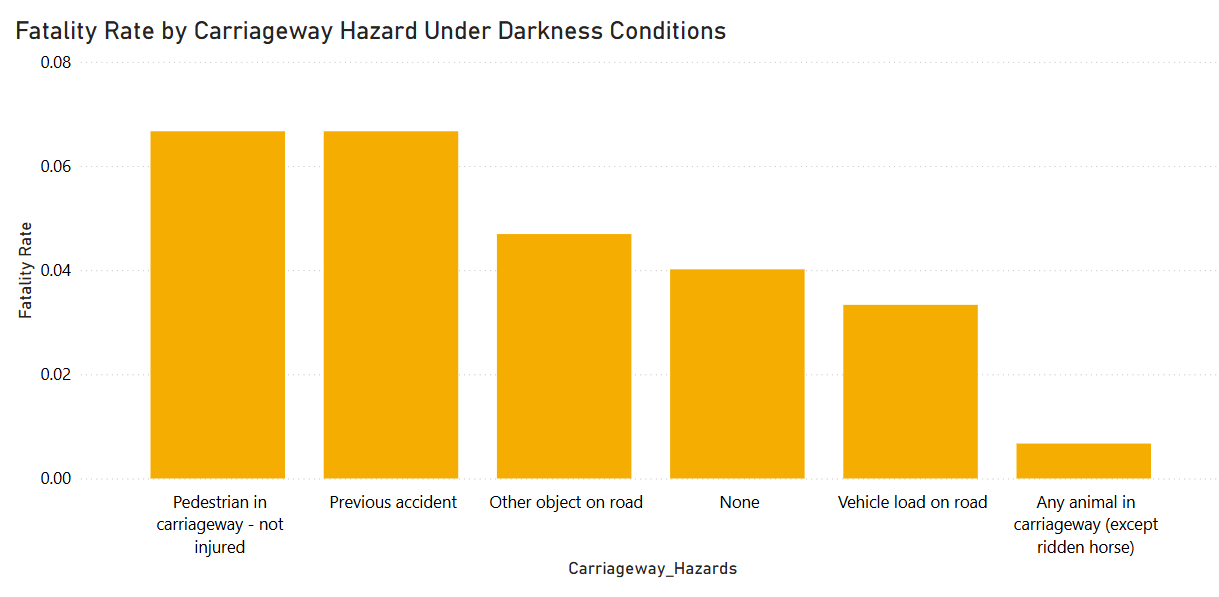

## Recommendations

🚦 Improve Safety in High-Risk Timeframes
Increase traffic awareness during early morning and late-night hours, when fatal accidents are most likely.

🌧 Enhance Driver Awareness During Hazardous Weather
Encourage use of headlights, fog lights, and safe driving distances during poor visibility.

🛣 Redesign High-Risk Road Types.

💡 Improve Road Lighting and Visibility
Install or upgrade street lighting, especially in areas with a history of severe night-time accidents.


## Limitations and Assumptions

- No Traffic Volume Data:

    - Traffic volume is the number of vehicles on the road at different times.
    - A high number of accidents in one area may not necessarily indicate dangerous conditions—it could simply have higher traffic flow
  
- The dataset covers only a short period it may not capture long-term trends



## References

In [29]:
#clean_df.to_csv("Road_accident_Clean_data.csv")